In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns 
import matplotlib.pyplot as plt 
%matplotlib inline

In [8]:
house = pd.read_csv('C:\\Users\\user pc\\Downloads\\Py_DS_ML_Bootcamp-master\\Refactored_Py_DS_ML_Bootcamp-master\\11-Linear-Regression\\USA_Housing.csv')

In [9]:
house.head()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price,Address
0,79545.458574,5.682861,7.009188,4.09,23086.800503,1.059034e+06,"208 Michael Ferry Apt. 674\nLaurabury, NE 3701..."
1,79248.642455,6.002900,6.730821,3.09,40173.072174,1.505891e+06,"188 Johnson Views Suite 079\nLake Kathleen, CA..."
2,61287.067179,5.865890,8.512727,5.13,36882.159400,1.058988e+06,"9127 Elizabeth Stravenue\nDanieltown, WI 06482..."
3,63345.240046,7.188236,5.586729,3.26,34310.242831,1.260617e+06,USS Barnett\nFPO AP 44820
4,59982.197226,5.040555,7.839388,4.23,26354.109472,6.309435e+05,USNS Raymond\nFPO AE 09386


In [10]:
house.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 7 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   Avg. Area Income              5000 non-null   float64
 1   Avg. Area House Age           5000 non-null   float64
 2   Avg. Area Number of Rooms     5000 non-null   float64
 3   Avg. Area Number of Bedrooms  5000 non-null   float64
 4   Area Population               5000 non-null   float64
 5   Price                         5000 non-null   float64
 6   Address                       5000 non-null   object 
dtypes: float64(6), object(1)
memory usage: 273.6+ KB


In [11]:
house.columns

Index(['Avg. Area Income', 'Avg. Area House Age', 'Avg. Area Number of Rooms',
       'Avg. Area Number of Bedrooms', 'Area Population', 'Price', 'Address'],
      dtype='object')

In [12]:
house.describe()

,Avg. Area Income,Avg. Area House Age,Avg. Area Number of Rooms,Avg. Area Number of Bedrooms,Area Population,Price
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5.000000e+03
mean,68583.108984,5.977222,6.987792,3.981330,36163.516039,1.232073e+06
std,10657.991214,0.991456,1.005833,1.234137,9925.650114,3.531176e+05
min,17796.631190,2.644304,3.236194,2.000000,172.610686,1.593866e+04
25%,61480.562388,5.322283,6.299250,3.140000,29403.928702,9.975771e+05
50%,68804.286404,5.970429,7.002902,4.050000,36199.406689,1.232669e+06
75%,75783.338666,6.650808,7.665871,4.490000,42861.290769,1.471210e+06
max,107701.748378,9.519088,10.759588,6.500000,69621.713378,2.469066e+06


In [13]:
house.isna().sum()

Avg. Area Income                0
Avg. Area House Age             0
Avg. Area Number of Rooms       0
Avg. Area Number of Bedrooms    0
Area Population                 0
Price                           0
Address                         0
dtype: int64

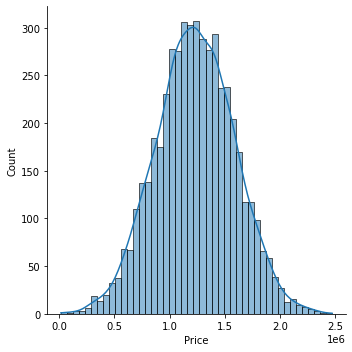

In [17]:
sns.displot(house['Price'],kde=True)

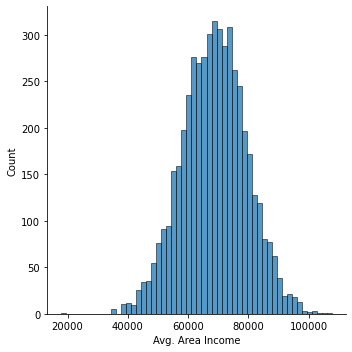

In [18]:
sns.displot(house['Avg. Area Income'])

<AxesSubplot:ylabel='Frequency'>

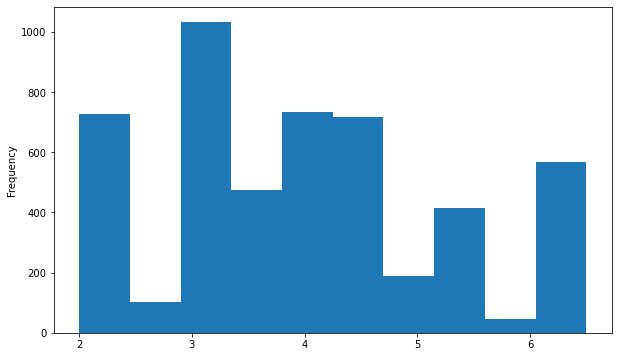

In [21]:
plt.figure(figsize=(10,6))
house['Avg. Area Number of Bedrooms'].plot(kind='hist')

In [26]:
house.corr()['Price'].sort_values()

Avg. Area Number of Bedrooms    0.171071
Avg. Area Number of Rooms       0.335664
Area Population                 0.408556
Avg. Area House Age             0.452543
Avg. Area Income                0.639734
Price                           1.000000
Name: Price, dtype: float64

In [28]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

In [32]:
X =  house.drop(['Address','Price'],axis=1)
y =  house['Price']

In [33]:
X.shape

(5000, 5)

In [34]:
y.shape

(5000,)

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33)

In [36]:
#Training 

In [37]:
house_mod =  LinearRegression()

In [38]:
house_mod.fit(X_train,y_train)

LinearRegression()

In [39]:
house_prediction = house_mod.predict(X_test)

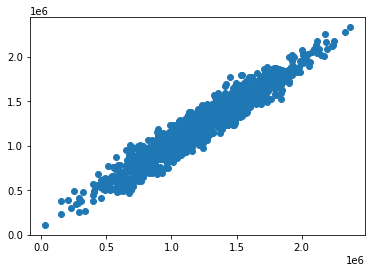

In [40]:
plt.scatter(y_test,house_prediction)

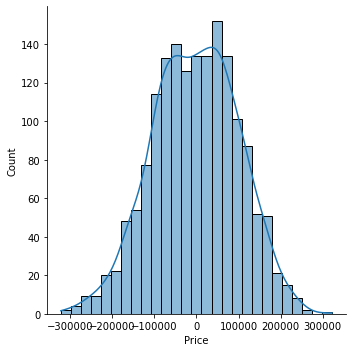

In [42]:
#Residuals
sns.displot((y_test-house_prediction),kde=True)

In [43]:
from sklearn import metrics

In [46]:
print('MSE: ', metrics.mean_squared_error(y_test,house_prediction))
print('MAE: ', metrics.mean_absolute_error(y_test,house_prediction))
print('RMSE: ', np.sqrt(metrics.mean_squared_error(y_test,house_prediction)))

MSE:  10281832732.250963
MAE:  82597.50196169075
RMSE:  101399.37244505492
